<a href="https://colab.research.google.com/github/AlAminTanin56/NLP-for-review/blob/main/nlp_for_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [27]:
!pip install optuna

In [28]:
# Initializing Environment and Loading Dataset
# The code block initializes the environment by importing necessary libraries and downloading NLTK resources. It then loads the dataset from a CSV file using pandas.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import confusion_matrix
import seaborn as sns # Visualization library for statistical data
import matplotlib.pyplot as plt # Visualization library for creating plots
import nltk # Natural Language Toolkit
import re # Regular expression operations
from nltk.corpus import stopwords as nltk_stopwords # NLTK stopwords corpus
from nltk.stem import WordNetLemmatizer # WordNet lemmatizer for word normalization
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF Vectorizer for text feature extraction
import joblib # Library for saving and loading Python objects

nltk.download('stopwords') # Download NLTK stopwords
nltk.download('wordnet') # Download NLTK WordNet corpus


#Load Dataset
df = pd.read_csv('/content/drive/MyDrive/googleplaystore_user_reviews.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
print('hello')

hello


In [29]:
#Now Lets set dataset which collumns we are interested
df = pd.concat([df.Translated_Review, df.Sentiment], axis = 1)
df

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
2,NaN,NaN
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
...,...,...
64290,NaN,NaN
64291,NaN,NaN
64292,NaN,NaN
64293,NaN,NaN


In [30]:
#Now eleminate the nan value becasue they can affect our model
df.dropna(axis = 0, inplace = True)
df

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
...,...,...
64222,Most ads older many agents ..not much owner po...,Positive
64223,"If photos posted portal load, fit purpose. I'm...",Positive
64226,"Dumb app, I wanted post property rent give opt...",Negative
64227,I property business got link SMS happy perform...,Positive


In [13]:
df.shape
df

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
...,...,...
64222,Most ads older many agents ..not much owner po...,Positive
64223,"If photos posted portal load, fit purpose. I'm...",Positive
64226,"Dumb app, I wanted post property rent give opt...",Negative
64227,I property business got link SMS happy perform...,Positive


In [31]:
df.head(20)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
6,Amazing,Positive
8,"Looking forward app,",Neutral
9,It helpful site ! It help foods get !,Neutral
10,good you.,Positive
11,Useful information The amount spelling errors ...,Positive


In [15]:
print(df['Sentiment'].unique())

['Positive' 'Neutral' 'Negative']


<Axes: xlabel='Sentiment'>

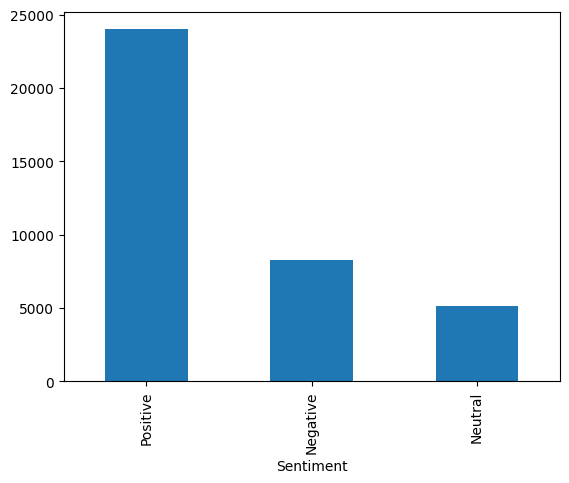

In [34]:
df.Sentiment.value_counts().plot(kind="bar")

In [17]:
df

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
...,...,...
64222,Most ads older many agents ..not much owner po...,Positive
64223,"If photos posted portal load, fit purpose. I'm...",Positive
64226,"Dumb app, I wanted post property rent give opt...",Negative
64227,I property business got link SMS happy perform...,Positive


In [18]:
#Replace the Sentiment by Encoding, Positive=0, Negative = 1, Netural= 2
# Create a mapping dictionary
sentiment_mapping = {'Positive': 0, 'Negative': 1, 'Neutral': 2}

# Apply the mapping to create a new column with the text values
df['SentimentEncoded'] = df['Sentiment'].map(sentiment_mapping)
df

,Translated_Review,Sentiment,SentimentEncoded
0,I like eat delicious food. That's I'm cooking ...,Positive,0
1,This help eating healthy exercise regular basis,Positive,0
3,Works great especially going grocery store,Positive,0
4,Best idea us,Positive,0
5,Best way,Positive,0
...,...,...,...
64222,Most ads older many agents ..not much owner po...,Positive,0
64223,"If photos posted portal load, fit purpose. I'm...",Positive,0
64226,"Dumb app, I wanted post property rent give opt...",Negative,1
64227,I property business got link SMS happy perform...,Positive,0


In [19]:
df.Translated_Review

0        I like eat delicious food. That's I'm cooking ...
1          This help eating healthy exercise regular basis
3               Works great especially going grocery store
4                                             Best idea us
5                                                 Best way
                               ...                        
64222    Most ads older many agents ..not much owner po...
64223    If photos posted portal load, fit purpose. I'm...
64226    Dumb app, I wanted post property rent give opt...
64227    I property business got link SMS happy perform...
64230    Useless app, I searched flats kondapur, Hydera...
Name: Translated_Review, Length: 37427, dtype: object

In [35]:
text = df.Translated_Review

#Preprocess the feedbacks
stopwords_set = set(nltk_stopwords.words('english'))

# Convert the stopwords set to a list
stopwords_list = list(stopwords_set)


def preprocess(text):
     # Convert the input to a string, in case it's not already
    user_feedback = str(text)

    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Remove non-alphabetic characters and convert to lower case
    user_feedback = re.sub(r'[^a-zA-Z\s]', '', user_feedback.lower())

    # Tokenize the text
    words = user_feedback.split()

    # Remove stopwords and lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords_set]

    # Convert the stopwords set to a list
    stopwords_list = list(words)

    # Join the words back into a single string
    user_feedback = ' '.join(stopwords_list)

    return user_feedback

# Apply the preprocess function to each feedback
# Assume 'feedbacks' is your list of feedbacks
processed_feedbacks = [preprocess(feedback) for feedback in text]




# TF-IDF Vectorization
# The code block initializes a TF-IDF Vectorizer with a list of stop words and fits it to the preprocessed feedbacks.
# TF-IDF Vectorization converts text data into numerical vectors based on term frequency-inverse document frequency.

# Initialize TF-IDF Vectorizer with stop words
vectorizer = TfidfVectorizer(stop_words=stopwords_list)
# Fit and transform preprocessed feedbacks into TF-IDF vectors
X = vectorizer.fit_transform(processed_feedbacks)

In [36]:
# then assign the sentiment column in the dataset to a new variable called 'y'
y = df.Sentiment

In [37]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# The code block splits the dataset into training and testing sets, with 80% of the data used for training and 20% for testing.
# This is essential for evaluating the model's performance on unseen data.
# The random_state parameter is used to seed the random number generator when splitting the data into training and testing sets.
# Setting it to a specific value ensures that the split is reproducible, meaning if you run the code again with the same random_state, you will get the same split.

# It can be assigned any integer value. Setting it to 0 is common practice, but you can choose any non-negative integer.
# The important thing is to use the same value consistently if you want reproducible results.

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (29941, 20719)
Shape of x_test: (7486, 20719)
Shape of y_train: (29941,)
Shape of y_test: (7486,)


<h2 style="color:yellow>SVM Classisifier</h2>

In [38]:
from sklearn.svm import SVC

# Train the SVM model
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Evaluate the model on the test set
accuracy = svm_model.score(x_test, y_test)
print("SVM Accuracy:", accuracy)

SVM Accuracy: 0.9122361741918248


In [39]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = svm_model.predict(x_test)

# Print the classification report
print(classification_report(y_test, y_pred))


# In the classification report:

# - Precision: Precision is the ratio of true positive predictions to the total predicted positives. It measures the accuracy of positive predictions.
# - Recall: Recall is the ratio of true positive predictions to the total actual positives. It measures the ability of the model to find all the positive samples.
# - F1-score: The F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall.
# - Support: The number of actual occurrences of the class in the specified dataset.

# The values in the table represent the precision, recall, and F1-score for each class (Negative, Neutral, Positive).

# The `accuracy` represents the overall accuracy of the model, which is the ratio of correctly predicted instances to the total instances.

# In the `macro avg` row, the precision, recall, and F1-score are calculated by averaging the respective metrics for each class.

# In the `weighted avg` row, the metrics are calculated by taking the weighted average of the precision, recall, and F1-score, weighted by the support of each class.

# The value assigned to each metric reflects the performance of the classifier for the given dataset.
# For example, a precision of 0.91 for the Positive class means that 91% of the instances predicted as Positive are actually Positive.
# Similarly, an accuracy of 0.91 means that 91% of the predictions made by the model are correct.

              precision    recall  f1-score   support

    Negative       0.94      0.80      0.87      1687
     Neutral       0.88      0.81      0.84      1060
    Positive       0.91      0.97      0.94      4739

    accuracy                           0.91      7486
   macro avg       0.91      0.86      0.88      7486
weighted avg       0.91      0.91      0.91      7486



In [40]:
#Now Fitting Random Forest Classifier to the Traning set
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 250, random_state = 42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=42)

In [41]:
# Predicting the Test set results
y_pred_rf = rf_model.predict(x_test)

# Printing the classification report
from sklearn.metrics import classification_report
print("Classification Report for Random Forest Model:")
print(classification_report(y_test, y_pred_rf))


Classification Report for Random Forest Model:
              precision    recall  f1-score   support

    Negative       0.97      0.71      0.82      1687
     Neutral       0.86      0.85      0.86      1060
    Positive       0.89      0.98      0.93      4739

    accuracy                           0.90      7486
   macro avg       0.91      0.84      0.87      7486
weighted avg       0.90      0.90      0.89      7486



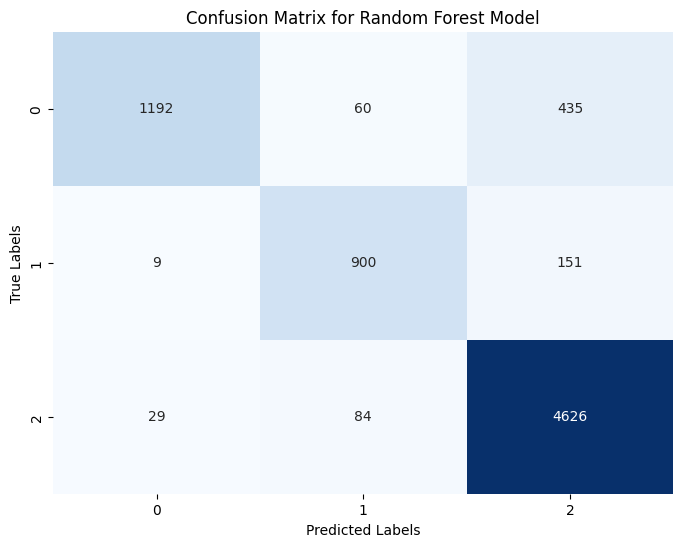

In [42]:
# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


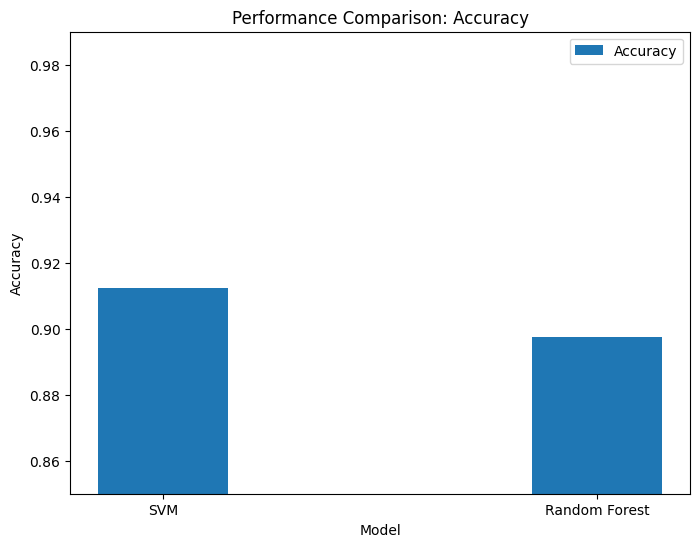

In [43]:
# Calculate accuracy for SVM and Random Forest models
svm_accuracy = svm_model.score(x_test, y_test)
rf_accuracy = rf_model.score(x_test, y_test)

# Create a bar plot to visualize the performance
model_names = ['SVM', 'Random Forest']
accuracies = [svm_accuracy, rf_accuracy]

plt.figure(figsize=(8, 6))
x = range(len(model_names))
width = 0.3

plt.bar(x, accuracies, width, label='Accuracy')
plt.xticks(x, model_names)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Performance Comparison: Accuracy')
plt.ylim(0.85, 0.99)
plt.legend()
plt.show()


In [44]:
num_classes = len(set(y_train))
print("Number of classes:", num_classes)

Number of classes: 3


In [45]:
# Save the rf_model model
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [46]:
# # Initialize the TfidfVectorizer with max_features=1000
vectorizer = TfidfVectorizer(stop_words=stopwords_list)
X = vectorizer.fit_transform(processed_feedbacks)

# text = 'extremely negative poor'

# # Test the preprocess_text function
processed_review = preprocess(text)
print("well: ",processed_review)

# # Transform the preprocessed text into TF-IDF vectors
vectorized_text = vectorizer.transform([processed_review])
print("TF-IDF vectors: ", vectorized_text)

rf_model = joblib.load("rf_model.pkl")

# # Predict using the trained Random Forest model
prediction = rf_model.predict(vectorized_text)
print("Prediction: ", prediction)


well:  like eat delicious food thats im cooking help eating healthy exercise regular basis work great especially going grocery store best idea u best way ad older many agent much owner po photo posted portal load fit purpose im dumb app wanted post property rent give opt property business got link sm happy perform useless app searched flat kondapur hydera name translatedreview length dtype object
TF-IDF vectors:    (0, 20316)	0.06708529409123615
  (0, 19917)	0.07550585320148522
  (0, 19846)	0.11184684469217004
  (0, 19408)	0.1027081117415656
  (0, 18044)	0.09681075732099623
  (0, 17232)	0.10788622214209911
  (0, 16581)	0.14629330107933425
  (0, 15916)	0.15568993880923862
  (0, 15045)	0.16252114282185887
  (0, 14894)	0.13187971975856638
  (0, 14321)	0.13225162394830173
  (0, 14194)	0.293376422469124
  (0, 13808)	0.14924566642060416
  (0, 13804)	0.1203378096254751
  (0, 13778)	0.16443798765581727
  (0, 13676)	0.15506193290905407
  (0, 13402)	0.09870121600162748
  (0, 13274)	0.16896541521

In [47]:
def predict_sentiment(text):
    """
    Predict sentiment for a single input text.
    """
    # Initialize the TfidfVectorizer with max_features=1000
    vectorizer = TfidfVectorizer(stop_words=stopwords_list)
    X = vectorizer.fit_transform(processed_feedbacks)
    print("Vector: ", X)

    # Test the preprocess_text function
    processed_review = preprocess(text)
    print("Well: ",processed_review)

    # Transform the preprocessed text into TF-IDF vectors
    vectorized_text = vectorizer.transform([processed_review])
    print("TF-IDF vectors: ", vectorized_text)

    rf_model = joblib.load("rf_model.pkl")

    # Predict using the trained Random Forest model
    prediction = rf_model.predict(vectorized_text)
    print("Prediction: ", prediction)


    return prediction


In [48]:
# Test the predict_sentiment function with a single review
review = 'extremely slow and bad!'
print("Predictionss: ", predict_sentiment(review))



Vector:    (0, 10439)	0.18934372073414937
  (0, 16182)	0.34361966753629314
  (0, 651)	0.14119466148669665
  (0, 10741)	0.15707454069507923
  (0, 8404)	0.1614680400668063
  (0, 1959)	0.2928675053019674
  (0, 2884)	0.24060672183139273
  (0, 3919)	0.2691675010108086
  (0, 8947)	0.13526392977082588
  (0, 18044)	0.18378560449899523
  (0, 6969)	0.5776468053783096
  (0, 4643)	0.31841749452439394
  (0, 5620)	0.24425973487081115
  (0, 10470)	0.11170615085119776
  (1, 1744)	0.4784684883928723
  (1, 14894)	0.41312879817217935
  (1, 6234)	0.38329375379756025
  (1, 8345)	0.4368814906281365
  (1, 5625)	0.43774477682339225
  (1, 8404)	0.26644412837591636
  (2, 17232)	0.431796924386403
  (2, 7993)	0.5887093677232513
  (2, 7734)	0.37526573019896214
  (2, 6037)	0.44215315111252207
  (2, 7938)	0.24198718757514873
  :	:
  (37425, 10521)	0.24886879587580618
  (37425, 14490)	0.3327060282953527
  (37425, 16581)	0.3057676766241776
  (37425, 2616)	0.24583184653536527
  (37425, 8232)	0.22763904525690457
  (3742


[6]:
￼
df.head()
[6]:
Translated_Review	Sentiment
0	I like eat delicious food. That's I'm cooking ...	Positive
1	This help eating healthy exercise regular basis	Positive
3	Works great especially going grocery store	Positive
4	Best idea us	Positive
5	Best way	Positive
[6]:
￼
df.head()
[6]:
Translated_Review	Sentiment
0	I like eat delicious food. That's I'm cooking ...	Positive
1	This help eating healthy exercise regular basis	Positive
3	Works great especially going grocery store	Positive
4	Best idea us	Positive
5	Best way	Positive#**Conculation**
#For NLP Naive Bayes classifier and Random Forest Classifier both are used. In this particular case Random Forest gives us better  result
